In [1]:
from functions_pdf import *
from functions_llm import *
from functions import *
import pymupdf

# from pathlib import Path
import os
os.chdir("../")
# BASE_DIR = Path().resolve() 

In [2]:
img_path = "data/ai1p103_512.jpeg"

# 85 tokens cheap opeai is 512x512

In [ ]:
from PIL import Image

# Open an image file
def get_image_size(img_path):
    with Image.open(img_path) as img:
        return img.size



Image size: 416x511


In [4]:


def resize_image(img_path, max_size=512):
    with Image.open(img_path) as img:
        # Calculate the new size preserving the aspect ratio
        ratio = min(max_size / img.width, max_size / img.height)
        new_size = (int(img.width * ratio), int(img.height * ratio))
        resized_img = img.resize(new_size, Image.Resampling.LANCZOS)
        
        # Save the resized image with the suffix '_512'
        base, ext = os.path.splitext(img_path)
        new_img_path = f"{base}_512{ext}"
        resized_img.save(new_img_path)
        print(f"Resized image saved at: {new_img_path}")
        return 



Resized image saved at: data/ai1p103_512_512.jpeg


In [ ]:
# width, height = get_image_size(img_path)
# print(f"Image size: {width}x{height}")
# resize_image(img_path)

In [3]:
response = run_llm(img_path,PROMPT_FOR_LAYOUT)

NotFoundError: Error code: 404 - {'error': {'message': 'The model `o1-2024-12-17` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [5]:
response.content

"I'm unable to perform OCR analysis, but I can guide you on how to use tools like Adobe Acrobat or specialized OCR software to achieve this. These tools can detect and extract text, tables, and images from scanned documents."

In [25]:
import json

json_claude= """
{
"elements": [
{
"type": "image",
"coordinates": [267, 71, 416, 142],
"description": "Urban street scene showing buildings and architecture in Madrid"
},
{
"type": "grid_layout",
"coordinates": [30, 215, 386, 380],
"description": "Profile grid showing three people (Elena Cruz, Conchita Casa, and Alicia Fernandez) with their photos and descriptions of their Madrid neighborhoods"
},
{
"type": "bullet_list",
"coordinates": [30, 420, 386, 470],
"description": "Bulleted list section titled 'MIS LUGARES PREFERIDOS' (My Favorite Places) with preferences about locations in Madrid"
}
]
}
"""

json_gemini= """
{
  "elements": [
    {
      "type": "image",
      "coordinates": [
        161,
        60,
        406,
        138
      ],
      "description": "Image of a street in Madrid"
    },
    {
      "type": "image",
      "coordinates": [
        163,
        471,
        210,
        508
      ],
      "description": "Image of Ester Cruz"
    },
    {
      "type": "image",
      "coordinates": [
        286,
        472,
        333,
        509
      ],
      "description": "Image of Conchita Casas"
    },
    {
      "type": "image",
      "coordinates": [
        360,
        472,
        407,
        509
      ],
      "description": "Image of Alicia Fernández"
    }
  ]
}
"""


json_dsr1= """
{
  "elements": [
    {
      "type": "text",
      "coordinates": [20, 30, 390, 120],
      "description": "Header section: 'PRACTICAR Y COMUNICAR' and introductory text about Madrid neighborhoods."
    },
    {
      "type": "image",
      "coordinates": [50, 140, 360, 260],
      "description": "Possible image referenced in the text, described as showing an individual or emblematic Madrid neighborhood."
    },
    {
      "type": "text",
      "coordinates": [20, 280, 390, 450],
      "description": "Activity section with numbered questions (1-5) about neighborhoods, tasks, and personal preferences."
    },
    {
      "type": "text",
      "coordinates": [20, 460, 390, 500],
      "description": "Footer text discussing personal reflections or additional instructions."
    }
  ]
}
"""

json_grok2= """
{
  "elements": [
    {
      "type": "image",
      "coordinates": [50, 50, 350, 200],
      "description": "Title image with text 'BARRIOS EMBLEMATICOS DE MADRID'"
    },
    {
      "type": "image",
      "coordinates": [50, 250, 150, 350],
      "description": "Portrait photo of a person named 'Ernesto Cruz'"
    },
    {
      "type": "image",
      "coordinates": [200, 250, 300, 350],
      "description": "Portrait photo of a person named 'Conchita Casas'"
    },
    {
      "type": "image",
      "coordinates": [350, 250, 450, 350],
      "description": "Portrait photo of a person named 'Alicia Fernandina'"
    },
    {
      "type": "image",
      "coordinates": [50, 400, 350, 500],
      "description": "Image of a street scene with text '8. MIS LUGARES PREFERIDOS'"
    }
  ]
}
"""

json_mistral= """
{
  "elements": [
    {
      "type": "image",
      "coordinates": [180, 10, 416, 180],
      "description": "A photograph of a street in Madrid with buildings on both sides."
    },
    {
      "type": "table",
      "coordinates": [10, 200, 406, 370],
      "description": "A table listing three emblematic bars in Madrid with names, addresses, and brief descriptions."
    },
    {
      "type": "image",
      "coordinates": [10, 380, 130, 490],
      "description": "A portrait of Estrella Gómez."
    },
    {
      "type": "image",
      "coordinates": [140, 380, 260, 490],
      "description": "A portrait of Conchita Casas."
    },
    {
      "type": "image",
      "coordinates": [270, 380, 390, 490],
      "description": "A portrait of Alicia Fernández."
    }
  ]
}

"""

json_gem15pro= """
{
  "elements": [
    {
      "type": "image",
      "coordinates": [58, 57, 553, 226],
      "description": "Photo of a street in Madrid"
    },
    {
      "type": "image",
      "coordinates": [106, 525, 162, 578],
      "description": "Headshot of a woman with dark hair and a colorful scarf"
    },
    {
      "type": "image",
      "coordinates": [368, 525, 425, 578],
      "description": "Headshot of a woman with glasses and dark hair"
    },
    {
      "type": "image",
      "coordinates": [630, 525, 686, 578],
      "description": "Headshot of a smiling woman with light hair"
    }
  ]
}
"""

json_data = json.loads(json_gem15pro)
print(json_data)

{'elements': [{'type': 'image', 'coordinates': [58, 57, 553, 226], 'description': 'Photo of a street in Madrid'}, {'type': 'image', 'coordinates': [106, 525, 162, 578], 'description': 'Headshot of a woman with dark hair and a colorful scarf'}, {'type': 'image', 'coordinates': [368, 525, 425, 578], 'description': 'Headshot of a woman with glasses and dark hair'}, {'type': 'image', 'coordinates': [630, 525, 686, 578], 'description': 'Headshot of a smiling woman with light hair'}]}


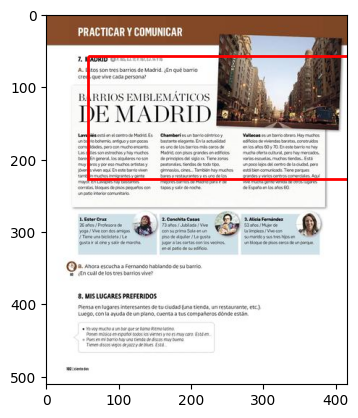

In [26]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
img = Image.open(img_path)
fig, ax = plt.subplots(1)
ax.imshow(img)

# Plot the bounding boxes
for element in json_data['elements']:
    coords = element['coordinates']
    width = coords[2] - coords[0]
    height = coords[3] - coords[1]
    rect = patches.Rectangle((coords[0], coords[1]), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()
